In [22]:
import os

MAPPED = 'group_repositories_per_topic.json'
TOPICS = [
    "topic_0",
    "topic_1",
    "topic_2",
    "topic_3",
    "topic_4",
]
CLASSES = 'classes2.json'
METADATA = 'metadata.json'
FUNCTIONS = 'go-functions.json'

In [23]:
import boto3
import json

AWS_ACCESS_KEY = os.getenv('AWS_ACCESS_KEY')
AWS_SECRET_ACCESS_KEY = os.getenv('AWS_SECRET_ACCESS_KEY')
BUCKET = os.getenv('BUCKET')
s3 = boto3.client('s3', aws_access_key_id=AWS_ACCESS_KEY, aws_secret_access_key=AWS_SECRET_ACCESS_KEY)

In [24]:
def s3_load(key):
  obj = s3.get_object(Bucket=BUCKET, Key=key)
  return json.loads(obj['Body'].read().decode('utf-8'))

def s3_save(key, data):
  s3.put_object(Bucket=BUCKET, Key=key, Body=json.dumps(data))

In [25]:
classes = s3_load(CLASSES)

In [26]:
for topic in classes:
  klass_count = 0
  for repo in classes[topic]:
    klass_count += len(repo['classes'])
  print(topic, klass_count/len(classes[topic]))

topic_0 2.6337579617834397
topic_1 2.4182944259171033
topic_2 3.004304160688666
topic_3 2.812351543942993
topic_4 2.3670320747056435


In [27]:
classes_f = []
repos_topic = {}
for topic in TOPICS:
  classes_f.append(s3_load(f"{topic}/classes.json"))
  repos_topic[topic] = sorted(classes[topic], key=lambda repo: repo['stars'], reverse=True)[:10]

In [72]:
def find_function(functions, func_id):
  for func in functions:
    if func['id'] == func_id:
      return func
  return None


def find_functions(func_ids, topic):
  print(func_ids)
  f = []
  print("On topic:", topic)
  for repo in repos_topic[topic]:
    functions = s3_load(f"{repo['key']}/{FUNCTIONS}")
    for func in functions:
      if func['id'] in func_ids:
        f.append(func)
  print("Found:", len(f), topic)
  return 

concurrency = ["mutex", "waitgroup", "chan"]
mocks = ["mock", "fake", "mockservice", "fakeservice"]
types = ["type", "switch", "case"]
config = ["config", "env", "flag", "viper", "init", "settings"]

def print_classes_code(repo_name, classes):
  funcs = s3_load(f"{repo_name}/{FUNCTIONS}")
  print(len(classes))
  for klass in classes:
    print("CLASS".center(50, "="))
    for id in klass:
      func = find_function(funcs, id)
      # if any(word in config for word in func['code'].lower().split()):
      print(func['code'])

def save_classes_code(repo_name, classes):
  funcs = s3_load(f"{repo_name}/{FUNCTIONS}")
  lines = f"TOTAL CLASSES {len(classes)}\n"
  for klass in classes:
    lines += "CLASS".center(20, "=") + "\n"
    for id in klass:
      func = find_function(funcs, id)
      lines += func['code'] + "\n"
  return lines

def json_classes_code(repo_name, classes):
  funcs = s3_load(f"{repo_name}/{FUNCTIONS}")
  codes = []
  for klass in classes:
    k = []
    for id in klass:
      func = find_function(funcs, id)
      k.append(func['code'])
    codes.append(k)
  return codes

In [54]:
for topic in repos_topic:
  print(topic, len(repos_topic[topic]))
  for repo in repos_topic[topic]:
    print(repo['key'], len(repo['classes']), repo['stars'])
  print("\n")

topic_0 10
junegunn/fzf 2 57530
wagoodman/dive 2 42548
coreybutler/nvm-windows 4 33303
spf13/viper 3 25212
tsenart/vegeta 5 22484
projectdiscovery/nuclei 1 16418
charmbracelet/gum 4 15909
bcicen/ctop 6 14993
FiloSottile/age 1 14855
gitleaks/gitleaks 2 14713


topic_1 10
fatedier/frp 9 77144
FiloSottile/mkcert 2 44662
ehang-io/nps 3 28567
schollz/croc 5 25745
inconshreveable/ngrok 1 23632
redis/go-redis 3 18715
yudai/gotty 2 18326
joewalnes/websocketd 6 17028
rakyll/hey 2 16914
XIU2/CloudflareSpeedTest 2 15319


topic_2 10
prometheus/prometheus 5 51732
rclone/rclone 6 42712
hashicorp/terraform 6 40408
hashicorp/vault 703 29289
hashicorp/consul 11 27562
tmrts/go-patterns 1 23606
hashicorp/packer 1 14780
rqlite/rqlite 3 14605
Netflix/chaosmonkey 3 14258
CodisLabs/codis 5 13027


topic_3 10
gohugoio/hugo 6 71281
syncthing/syncthing 11 58080
etcd-io/etcd 15 45720
gogs/gogs 3 43778
astaxie/build-web-application-with-golang 13 42697
spf13/cobra 1 35174
go-gorm/gorm 1 34799
unknwon/the-way-to-

In [64]:
for topic in repos_topic:
  print(topic, len(repos_topic[topic]))
  for repo in repos_topic[topic]:
    print(repo['key'], len(repo['classes']), repo['stars'])
    print_classes_code(repo['key'], repo['classes'])
  print("\n"*3)

topic_0 10
junegunn/fzf 2 57530
2
======================CLASS=======================
func getEnv(name string, defaultValue int) int {
	env := os.Getenv(name)
	if len(env) == 0 {
		return defaultValue
	}
	return atoi(env, defaultValue)
}
func (t *Terminal) Loop() {
	fitpad := <-t.startChan
	fit := fitpad.fit
	if fit >= 0 {
		pad := fitpad.pad
		t.tui.Resize(func(termHeight int) int {
			contentHeight := fit + t.extraLines()
			if t.needPreviewWindow() {
				if t.previewOpts.aboveOrBelow() {
					if t.previewOpts.size.percent {
						newContentHeight := int(float64(contentHeight) * 100. / (100. - t.previewOpts.size.size))
						contentHeight = util.Max(contentHeight+1+borderLines(t.previewOpts.border), newContentHeight)
					} else {
						contentHeight += int(t.previewOpts.size.size) + borderLines(t.previewOpts.border)
					}
				} else {
					contentHeight = util.Max(contentHeight, 1+borderLines(t.previewOpts.border))
				}
			}
			return util.Min(termHeight, contentHeight+pad)
		})
	}

In [71]:
file = open("codes.txt", "a")
for topic in repos_topic:
  print(topic, len(repos_topic[topic]))
  file.write(f"TOPIC {topic}\n")
  for repo in repos_topic[topic]:
    print(repo['key'], len(repo['classes']), repo['stars'])
    file.write(f"REPO {repo['key']} {len(repo['classes'])}\n")
    line = save_classes_code(repo['key'], repo['classes'])
    file.write(line)
  file.write("\n"*2)
file.close()

topic_0 10
junegunn/fzf 2 57530
wagoodman/dive 2 42548
coreybutler/nvm-windows 4 33303
spf13/viper 3 25212
tsenart/vegeta 5 22484
projectdiscovery/nuclei 1 16418
charmbracelet/gum 4 15909
bcicen/ctop 6 14993
FiloSottile/age 1 14855
gitleaks/gitleaks 2 14713
topic_1 10
fatedier/frp 9 77144
FiloSottile/mkcert 2 44662
ehang-io/nps 3 28567
schollz/croc 5 25745
inconshreveable/ngrok 1 23632
redis/go-redis 3 18715
yudai/gotty 2 18326
joewalnes/websocketd 6 17028
rakyll/hey 2 16914
XIU2/CloudflareSpeedTest 2 15319
topic_2 10
prometheus/prometheus 5 51732
rclone/rclone 6 42712
hashicorp/terraform 6 40408
hashicorp/vault 703 29289
hashicorp/consul 11 27562
tmrts/go-patterns 1 23606
hashicorp/packer 1 14780
rqlite/rqlite 3 14605
Netflix/chaosmonkey 3 14258
CodisLabs/codis 5 13027
topic_3 10
gohugoio/hugo 6 71281
syncthing/syncthing 11 58080
etcd-io/etcd 15 45720
gogs/gogs 3 43778
astaxie/build-web-application-with-golang 13 42697
spf13/cobra 1 35174
go-gorm/gorm 1 34799
unknwon/the-way-to-go_ZH_

In [73]:
file = open("codes.json", "a")
objs = []
for topic in repos_topic:
  for repo in repos_topic[topic]:
    ob = {
      'repository': repo['key'],
      'topic': topic,
      'total_classes': len(repo['classes']),
      'classes': json_classes_code(repo['key'], repo['classes'])
    }
    objs.append(ob)
file.write(json.dumps(objs)) 
file.close()

In [38]:
# average number of elements per class per topic
for topic in repos_topic:
  total = 0
  for repo in repos_topic[topic]:
    for klass in repo['classes']:
      total += len(klass)
  print(topic, total/len(repos_topic[topic]))
    

topic_0 355.9
topic_1 320.3
topic_2 832.0
topic_3 567.2
topic_4 247.2


In [80]:
import json
from collections import Counter

file_path = "codes.json"
with open(file_path, 'r') as file:
    data = json.load(file)

categories = {
    "Concurrency": ["sync", "lock", "mutex", "parallel", "goroutine", "wait", "go", "waitgroup", "chan", "select"],
    "Error Handling": ["error", "panic", "recover", "fail"],
    "Mocking": ["mock", "stub", "fake", "spy", "testdouble", "mockservice"],
    "Logging": ["log", "logger", "logging"],
    "Autogenerated Code": ["auto", "generate", "template"],
    "Utility Functions": ["util", "helper", "common", "tool", "contains", "prefix"],
    "Rendering/Output": ["render", "print", "output", "display", "draw"],
    "File/IO": ["file", "read", "write", "io", "stream", "open", "close"],
    "Configuration": ["config", "env", "flag", "viper", "init", "settings"],
    "Types": ["type", "switch", "case"],
}

category_counts = Counter()

for repo in data:
    for func in repo.get("classes", []):
        function_body = " ".join(func)
        matched_categories = set()
        
        for category, keywords in categories.items():
            if any(keyword in function_body.lower() for keyword in keywords):
                matched_categories.add(category)
        
        if not matched_categories:
            matched_categories.add("Uncategorized")
        
        for matched in matched_categories:
            category_counts[matched] += 1

category_counts

Counter({'Error Handling': 624,
         'File/IO': 601,
         'Logging': 407,
         'Configuration': 393,
         'Types': 372,
         'Concurrency': 369,
         'Utility Functions': 335,
         'Rendering/Output': 246,
         'Autogenerated Code': 200,
         'Uncategorized': 55,
         'Mocking': 28})

/Users/jbenitezg/Documents/GitHub/Go-Clone-Thesis/clone-detection/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/jbenitezg/Documents/GitHub/Go-Clone-Thesis/clone-detection/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace met

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

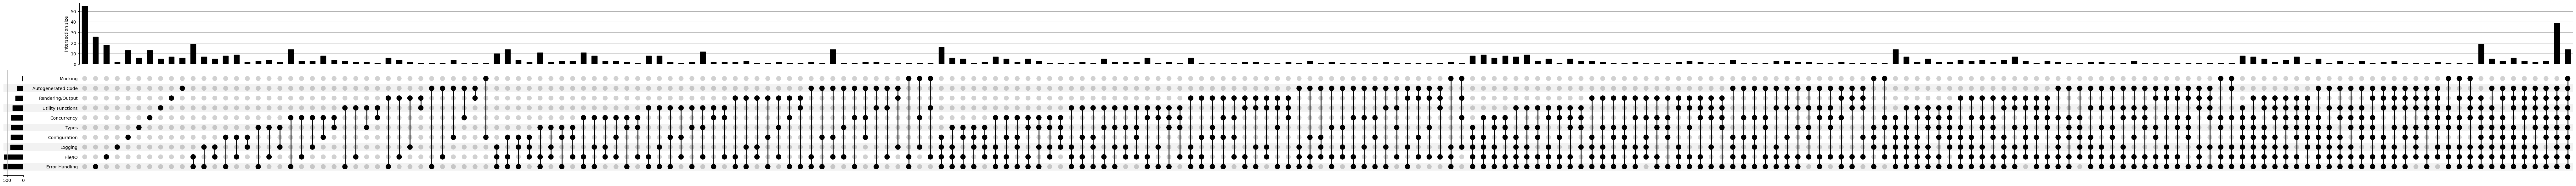

In [4]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from upsetplot import plot

file_path = "codes.json"
with open(file_path, 'r') as file:
    data = json.load(file)

categories = {
    "Concurrency": ["sync", "lock", "mutex", "parallel", "goroutine", "wait", "go", "waitgroup", "chan", "select"],
    "Error Handling": ["error", "panic", "recover", "fail"],
    "Mocking": ["mock", "stub", "fake", "spy", "testdouble", "mockservice"],
    "Logging": ["log", "logger", "logging"],
    "Autogenerated Code": ["auto", "generate", "template"],
    "Utility Functions": ["util", "helper", "common", "tool", "contains", "prefix"],
    "Rendering/Output": ["render", "print", "output", "display", "draw"],
    "File/IO": ["file", "read", "write", "io", "stream", "open", "close"],
    "Configuration": ["config", "env", "flag", "viper", "init", "settings"],
    "Types": ["type", "switch", "case"],
}

repo_classes = []

for repo in data:
	for func in repo.get("classes", []):
		function_body = "\n".join(func).lower()
		matched_categories = set()
		for category, keywords in categories.items():
			if any(keyword in function_body for keyword in keywords):
				matched_categories.add(category)
		if not matched_categories:
			matched_categories.add("Uncategorized")

		repo_classes.append(matched_categories)

category_sets = pd.DataFrame([{cat: (cat in entry) for cat in categories.keys()} for entry in repo_classes])

category_sets_grouped = category_sets.groupby(list(category_sets.columns)).size().reset_index(name='count')

cat_upset = category_sets_grouped.set_index(list(categories.keys()))['count']

plot(cat_upset)

In [5]:
most_common_combinations = category_sets_grouped.sort_values(by='count', ascending=False)
most_common_combinations.head(10)

,Concurrency,Error Handling,Mocking,Logging,Autogenerated Code,Utility Functions,Rendering/Output,File/IO,Configuration,Types,count
0,False,False,False,False,False,False,False,False,False,False,55
223,True,True,False,True,True,True,True,True,True,True,39
48,False,True,False,False,False,False,False,False,False,False,26
209,True,True,False,True,False,True,True,True,True,True,19
52,False,True,False,False,False,False,False,True,False,False,19
3,False,False,False,False,False,False,False,True,False,False,18
90,False,True,False,True,False,False,False,True,True,False,16
21,False,False,False,False,True,False,False,True,True,False,14
193,True,True,False,True,False,False,False,True,True,True,14
148,True,True,False,False,False,False,False,False,False,False,14
